In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
data = pd.read_csv("supply_chain_extended_data.csv")
data


,Warehouse_ID,Location,Current_Stock,Demand_Forecast,Lead_Time_Days,Shipping_Time_Days,Stockout_Risk,Operational_Cost,Supplier_ID,Product_Category,Monthly_Sales,Order_Processing_Time,Return_Rate,Customer_Rating,Warehouse_Capacity,Storage_Cost,Transportation_Cost,Backorder_Quantity,Damaged_Goods,Employee_Count
0,WH239,Dallas,3926,484,8,3,7,93895,S693,Groceries,4893,4.766231,6.053952,3.840976,28701,16975,2778,228,26,83
1,WH244,Houston,3032,5122,3,6,25,46847,S880,Electronics,4453,4.304335,3.886996,2.113929,36198,14052,1535,288,16,39
2,WH340,Chicago,4763,4343,5,5,16,64176,S116,Furniture,5956,1.030779,7.335160,4.211437,22784,9863,13435,153,3,49
3,WH428,Atlanta,2219,777,7,6,15,38940,S431,Apparel,5814,2.871244,1.393481,1.751671,13172,15911,14508,143,39,35
4,WH202,Dallas,809,4756,2,7,16,33933,S821,Electronics,2279,4.060930,4.212666,4.231919,39619,19011,1904,296,30,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,WH145,New York,4357,1521,10,5,20,65281,S830,Groceries,5909,3.938249,5.445214,1.829305,47701,1581,5792,119,43,97
496,WH181,Miami,3110,3322,4,7,8,88426,S663,Groceries,4584,3.786971,1.452853,4.916439,48667,4070,9536,47,29,77
497,WH068,Seattle,1636,4170,4,3,6,87751,S961,Apparel,1699,0.683904,8.474156,4.142398,17858,9501,5919,9,38,61
498,WH204,Seattle,1821,536,9,6,23,78229,S966,Electronics,8828,1.298125,7.006858,1.150413,12831,7219,3575,204,24,48


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Warehouse_ID           500 non-null    object 
 1   Location               500 non-null    object 
 2   Current_Stock          500 non-null    int64  
 3   Demand_Forecast        500 non-null    int64  
 4   Lead_Time_Days         500 non-null    int64  
 5   Shipping_Time_Days     500 non-null    int64  
 6   Stockout_Risk          500 non-null    int64  
 7   Operational_Cost       500 non-null    int64  
 8   Supplier_ID            500 non-null    object 
 9   Product_Category       500 non-null    object 
 10  Monthly_Sales          500 non-null    int64  
 11  Order_Processing_Time  500 non-null    float64
 12  Return_Rate            500 non-null    float64
 13  Customer_Rating        500 non-null    float64
 14  Warehouse_Capacity     500 non-null    int64  
 15  Storag

In [5]:
data.isnull().sum()

Warehouse_ID             0
Location                 0
Current_Stock            0
Demand_Forecast          0
Lead_Time_Days           0
Shipping_Time_Days       0
Stockout_Risk            0
Operational_Cost         0
Supplier_ID              0
Product_Category         0
Monthly_Sales            0
Order_Processing_Time    0
Return_Rate              0
Customer_Rating          0
Warehouse_Capacity       0
Storage_Cost             0
Transportation_Cost      0
Backorder_Quantity       0
Damaged_Goods            0
Employee_Count           0
dtype: int64

In [3]:
data[data.duplicated()].sum()

Warehouse_ID               0
Location                   0
Current_Stock              0
Demand_Forecast            0
Lead_Time_Days             0
Shipping_Time_Days         0
Stockout_Risk              0
Operational_Cost           0
Supplier_ID                0
Product_Category           0
Monthly_Sales              0
Order_Processing_Time    0.0
Return_Rate              0.0
Customer_Rating          0.0
Warehouse_Capacity         0
Storage_Cost               0
Transportation_Cost        0
Backorder_Quantity         0
Damaged_Goods              0
Employee_Count             0
dtype: object

<Axes: >

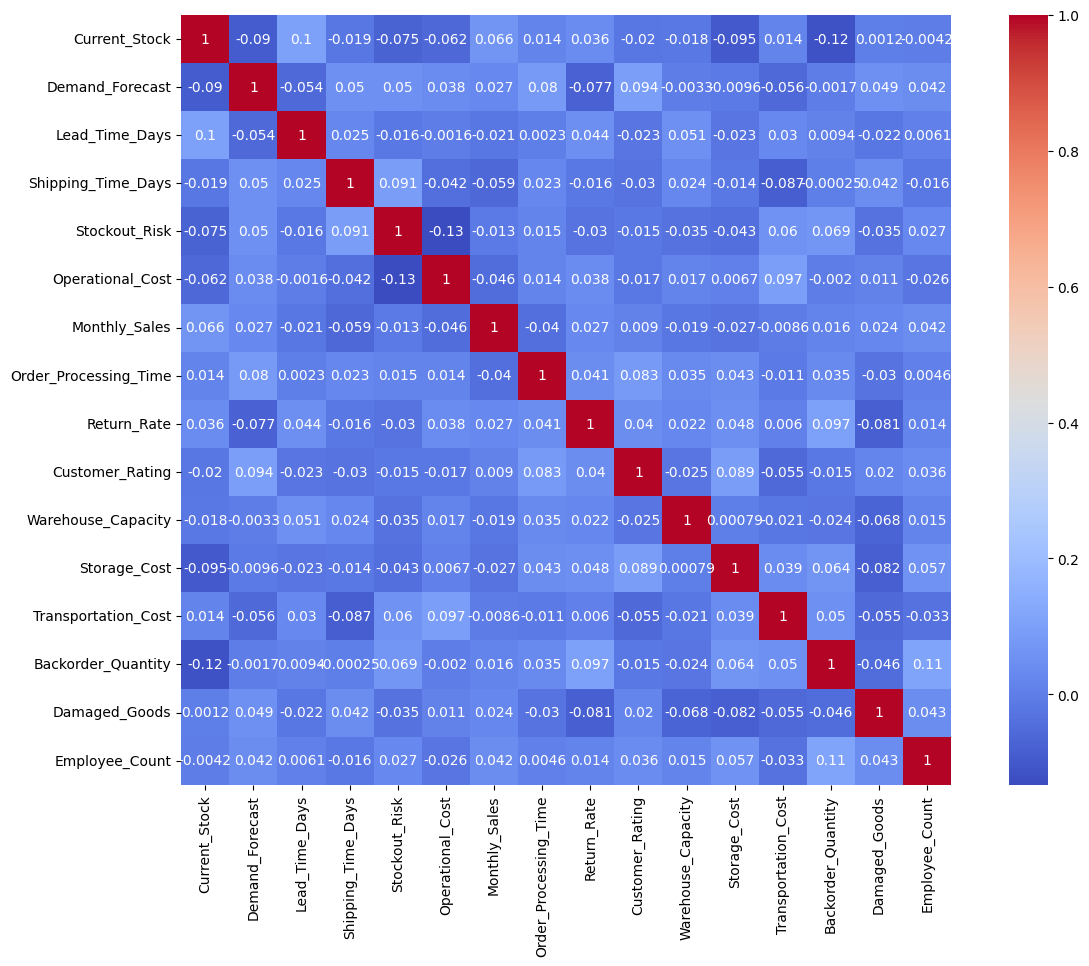

In [18]:
plt.figure(figsize=(15, 10))
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)

C:\Users\rahul\AppData\Local\Temp\ipykernel_20124\2799570144.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="Product_Category", y="Monthly_Sales", estimator=sum, ci=None)


<Axes: xlabel='Product_Category', ylabel='Monthly_Sales'>

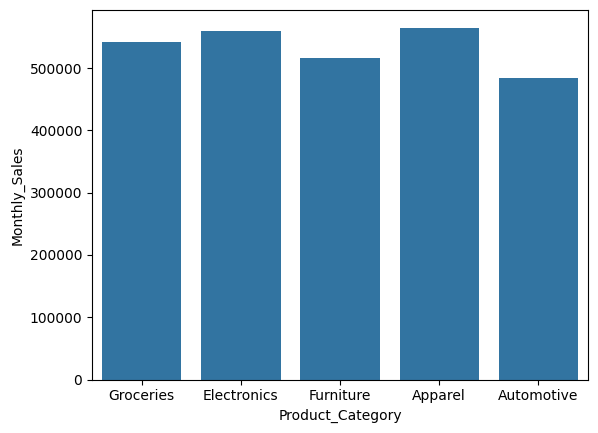

In [13]:
sns.barplot(data=data, x="Product_Category", y="Monthly_Sales", estimator=sum, ci=None)

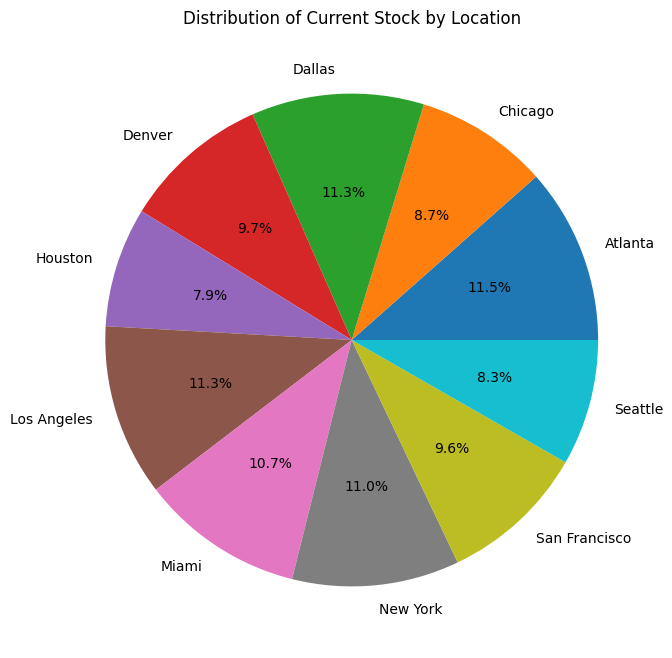

In [20]:
import matplotlib.pyplot as plt

# Aggregate data: sum up Current_Stock by Location
location_data = data.groupby("Location")["Current_Stock"].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_data, labels=location_data.index, autopct="%.1f%%", normalize=True)
plt.title("Distribution of Current Stock by Location")
plt.show()


C:\Users\rahul\AppData\Local\Temp\ipykernel_20124\4277987067.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="Product_Category", y="Return_Rate", estimator=sum, ci=None)


<Axes: xlabel='Product_Category', ylabel='Return_Rate'>

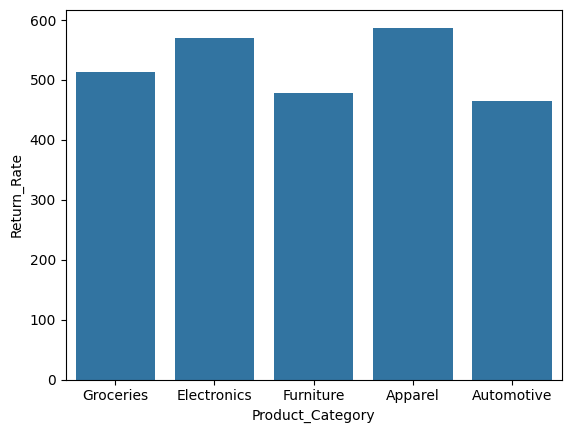

In [21]:
sns.barplot(data=data, x="Product_Category", y="Return_Rate", estimator=sum, ci=None)

In [25]:
data1 = pd.DataFrame(data.groupby("Location")["Warehouse_ID"].count())
data1.reset_index(inplace=True)
data1


,Location,Warehouse_ID
0,Atlanta,55
1,Chicago,44
2,Dallas,51
3,Denver,46
4,Houston,44
5,Los Angeles,54
6,Miami,56
7,New York,54
8,San Francisco,52
9,Seattle,44


C:\Users\rahul\AppData\Local\Temp\ipykernel_20124\3708069709.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x="Location", y="Warehouse_ID", estimator=sum, ci=None)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Atlanta'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'Dallas'),
  Text(3, 0, 'Denver'),
  Text(4, 0, 'Houston'),
  Text(5, 0, 'Los Angeles'),
  Text(6, 0, 'Miami'),
  Text(7, 0, 'New York'),
  Text(8, 0, 'San Francisco'),
  Text(9, 0, 'Seattle')])

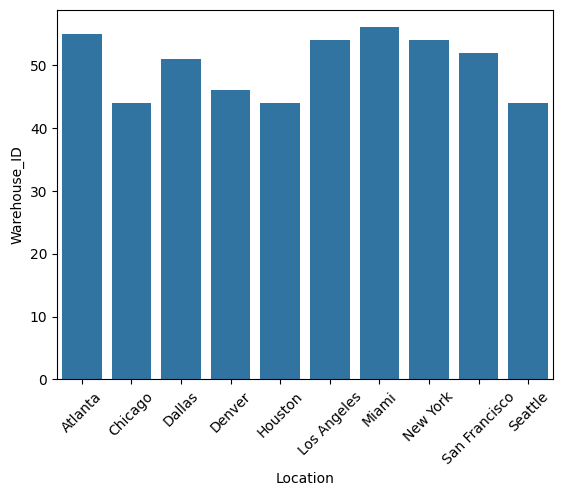

In [28]:
sns.barplot(data=data1, x="Location", y="Warehouse_ID", estimator=sum, ci=None)
plt.xticks(rotation=45)